In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA
import tensorflow as tf

In [3]:
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential

In [4]:
train_df = pd.read_csv('F:\my project\dataset\learning_dataset\\fashion-mnist_train.csv\\fashion-mnist_train.csv')
test_df = 'F:\my project\dataset\learning_dataset\\fashion-mnist_test.csv\\fashion-mnist_test.csv'
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = train_df.drop('label', axis=1).values
y_train = train_df.label.values
x_test = train_df.drop('label', axis=1).values
y_test = train_df.label.values

In [6]:
x_train = x_train / 255
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
x_test = x_test / 255

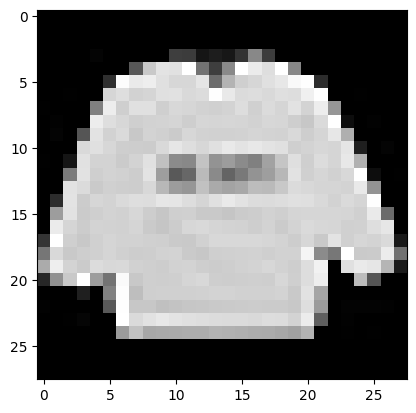

In [8]:
pca = PCA(n_components=50)
plt.imshow(x_train[0, :].reshape(28, 28), cmap='gray')

In [9]:
pca.fit(x_train)
x_train_c = pca.transform(x_train)

In [10]:
x_train_c

array([[ 3.68633325,  4.96052901, -0.0512319 , ...,  0.02374041,
         0.01101367,  0.2206911 ],
       [-4.37643435,  3.86105868, -1.94943298, ...,  0.63733848,
         0.04288374, -0.81515347],
       [ 7.26515192,  1.56875666,  2.3152385 , ...,  0.12629288,
         0.08265534,  0.09767531],
       ...,
       [ 2.18165029,  0.45177534, -0.55646425, ..., -0.47010019,
        -0.65409246, -0.41338206],
       [ 1.47006912,  6.06339785, -0.62475691, ...,  0.38576028,
         0.36060544,  0.22383206],
       [-3.57169302,  4.77114625, -0.26629271, ..., -0.40246906,
         0.08921034, -0.19652617]])

In [11]:
x_test_c = pca.transform(x_test)
x_test_c

array([[ 3.68633325,  4.96052901, -0.0512319 , ...,  0.02374041,
         0.01101367,  0.2206911 ],
       [-4.37643435,  3.86105868, -1.94943298, ...,  0.63733848,
         0.04288374, -0.81515347],
       [ 7.26515192,  1.56875666,  2.3152385 , ...,  0.12629288,
         0.08265534,  0.09767531],
       ...,
       [ 2.18165029,  0.45177534, -0.55646425, ..., -0.47010019,
        -0.65409246, -0.41338206],
       [ 1.47006912,  6.06339785, -0.62475691, ...,  0.38576028,
         0.36060544,  0.22383206],
       [-3.57169302,  4.77114625, -0.26629271, ..., -0.40246906,
         0.08921034, -0.19652617]])

In [12]:
from tensorflow import keras

In [13]:
from tensorflow.python.keras.callbacks import TensorBoard, LambdaCallback

In [14]:
class LogHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.acc = []
        self.weight1 = []
        self.weight2 = []

    def on_batch_end(self, batch, logs={}):
        self.weight1.append(model.layers[1].get_weights())
        self.weight2.append(model.layers[2].get_weights())
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))

In [15]:
import time

In [16]:
name = f'deep_mnist{int(time.time())}'
tensorboard = TensorBoard('F:\my project\dataset\learning_dataset\\tensor\\' + name, histogram_freq=1)

In [17]:
model = tf.keras.models.Sequential()

In [18]:
model.add(Dense(50, activation='relu', input_dim=x_train_c.shape[1]))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
history = LogHistory()

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
a = model.fit(x_test_c, y_train, batch_size=500, epochs=100, callbacks=[history])

Epoch 1/100
120/120 [==============================] - 2s 5ms/step - loss: 1.1186 - accuracy: 0.6424
Epoch 2/100
120/120 [==============================] - 1s 4ms/step - loss: 0.5164 - accuracy: 0.8167
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 0.4462 - accuracy: 0.8392
Epoch 4/100
120/120 [==============================] - 1s 8ms/step - loss: 0.4161 - accuracy: 0.8495
Epoch 5/100
120/120 [==============================] - 1s 6ms/step - loss: 0.3979 - accuracy: 0.8564
Epoch 6/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3840 - accuracy: 0.8611
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3729 - accuracy: 0.8651
Epoch 8/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3632 - accuracy: 0.8694
Epoch 9/100
120/120 [==============================] - 1s 4ms/step - loss: 0.3553 - accuracy: 0.8713
Epoch 10/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3482 - accura

In [22]:
model.layers[1].get_weights()

[array([[-0.21809128,  0.15289333, -0.53189236, ..., -0.2948493 ,
         -0.14583087,  0.00419744],
        [-0.18332079,  0.13341042,  0.08804666, ...,  0.24798834,
          0.25809258,  0.1322465 ],
        [-0.24238442,  0.4528861 ,  0.05531485, ..., -0.06823907,
          0.15478855, -0.33670455],
        ...,
        [ 0.28271368,  0.01400052,  0.20021382, ..., -0.3561291 ,
          0.12631352,  0.25322336],
        [ 0.23836517, -0.80869734,  0.1610542 , ...,  0.01209587,
          0.01851861,  0.16966535],
        [ 0.55713165, -0.05401801, -0.2308745 , ...,  0.4632536 ,
          0.22309612,  0.25307566]], dtype=float32),
 array([-0.07537024, -0.09680201, -0.09526162,  0.32741335,  0.5843322 ,
         0.23891899,  0.14247036,  0.07217199, -0.2600608 ,  0.30622208,
        -0.01554141,  0.24173754,  0.285648  ,  0.1488281 , -0.17693764,
         0.24014902,  0.01017455, -0.24323115, -0.22439003, -0.00189608,
         0.01096763, -0.01244664,  0.20694628,  0.28992978,  0.152

In [23]:
model.layers

In [24]:
history.weight1

[[array([[ 0.03998678, -0.00808823, -0.02205228, ..., -0.10256798,
          -0.10627945,  0.11035668],
         [-0.04262739,  0.10117932,  0.11901525, ..., -0.03887734,
           0.18809041, -0.09768931],
         [ 0.05332543, -0.01907768, -0.03202561, ...,  0.185434  ,
          -0.02894974, -0.1546278 ],
         ...,
         [-0.04278707, -0.07650665,  0.17458889, ..., -0.20886008,
           0.14510669, -0.04301518],
         [-0.04104021, -0.17019533,  0.01990283, ...,  0.10752948,
           0.10625531,  0.02959457],
         [ 0.21227281, -0.16813312, -0.12350884, ...,  0.01621748,
           0.18158005, -0.05316315]], dtype=float32),
  array([ 1.99959450e-03, -1.99983129e-03,  1.99970463e-03, -1.99972838e-03,
         -5.09934034e-06, -1.99974887e-03, -1.99986435e-03,  1.99933583e-03,
          1.99617376e-03,  1.99967180e-03,  1.99744361e-03,  1.99269596e-03,
         -1.99687784e-03,  1.99903664e-03, -1.99931487e-03, -1.99967041e-03,
          1.99837587e-03, -1.01397454

In [25]:
w1 = []
w2 = []
for i in history.weight1:
    w1.append(i[0][0, 0])
    w2.append(i[0][1, 0])

In [26]:
w1

[0.03998678,
 0.04098486,
 0.041983858,
 0.042986806,
 0.04383833,
 0.04453248,
 0.045283284,
 0.045856975,
 0.04648905,
 0.047166213,
 0.047852058,
 0.048491873,
 0.049112596,
 0.049784478,
 0.050559044,
 0.051401366,
 0.052213397,
 0.052905492,
 0.05363284,
 0.05434585,
 0.055002637,
 0.055610567,
 0.056163773,
 0.056571934,
 0.056693077,
 0.056774355,
 0.05682815,
 0.05690944,
 0.05704462,
 0.057091016,
 0.057149135,
 0.057291433,
 0.057398494,
 0.057371404,
 0.057340838,
 0.057261635,
 0.057148438,
 0.05701474,
 0.057021953,
 0.05717352,
 0.05729243,
 0.05738629,
 0.057568185,
 0.05786443,
 0.058108743,
 0.05847765,
 0.058828264,
 0.05919537,
 0.059576895,
 0.060141932,
 0.060743146,
 0.061443925,
 0.062288854,
 0.06313046,
 0.06399767,
 0.06485994,
 0.06560383,
 0.06626223,
 0.06688398,
 0.0674947,
 0.068109356,
 0.06866645,
 0.06914926,
 0.06965136,
 0.070167206,
 0.07063044,
 0.07096889,
 0.071321495,
 0.071638584,
 0.07184611,
 0.0721776,
 0.072506,
 0.07280112,
 0.073235035,
 

In [27]:
w2

[-0.042627387,
 -0.041628413,
 -0.04062637,
 -0.039649643,
 -0.03867441,
 -0.037736762,
 -0.036814965,
 -0.035926376,
 -0.03504281,
 -0.03416327,
 -0.033304453,
 -0.03255901,
 -0.031896524,
 -0.031240815,
 -0.030591527,
 -0.029966537,
 -0.029358266,
 -0.028853562,
 -0.028388768,
 -0.027944267,
 -0.027565036,
 -0.027287306,
 -0.027060632,
 -0.026897462,
 -0.026926953,
 -0.027040163,
 -0.027173877,
 -0.027355934,
 -0.027527453,
 -0.027808236,
 -0.02817924,
 -0.02863008,
 -0.029136756,
 -0.029719759,
 -0.030360138,
 -0.031074451,
 -0.031801224,
 -0.032530423,
 -0.03330114,
 -0.034071445,
 -0.03481872,
 -0.03552772,
 -0.03622585,
 -0.03686944,
 -0.03758742,
 -0.038327996,
 -0.03906875,
 -0.03978232,
 -0.040578984,
 -0.04133279,
 -0.042093005,
 -0.04278182,
 -0.04339744,
 -0.044020116,
 -0.04464125,
 -0.045317307,
 -0.046053156,
 -0.04677657,
 -0.047478244,
 -0.04810547,
 -0.04879061,
 -0.049458385,
 -0.05011324,
 -0.050686106,
 -0.05130938,
 -0.05197539,
 -0.052661132,
 -0.05331922,
 -0.05

In [28]:
history.weight1[1][0][0, 0]

0.04098486

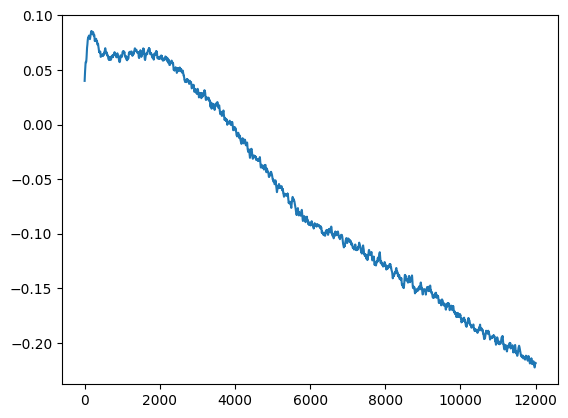

In [29]:
plt.plot(w1)

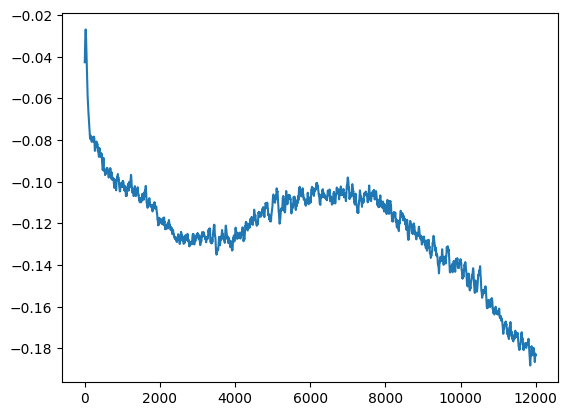

In [30]:
plt.plot(w2)

In [31]:
len(history.weight1)

12000

because update weight for 500s data (batch size =500) and all data =6000 so 6000/500=120

and epochs=100 then 100*120=12000

In [32]:
history.acc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

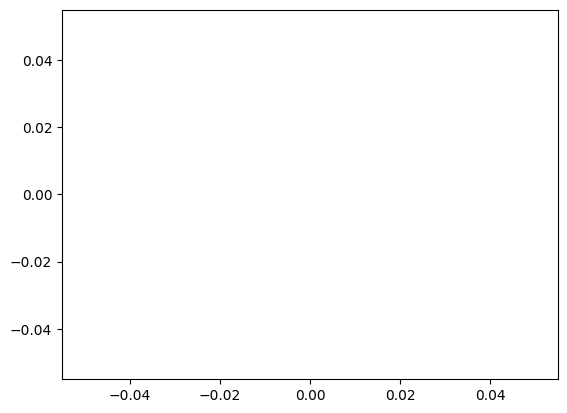

In [39]:
x_test_c = pca.transform(x_test)

In [40]:
pr = model.predict(x_test_c)

1875/1875 [==============================] - 2s 1ms/step


In [41]:
pr

array([[1.7010424e-02, 4.9484141e-05, 1.3237479e-01, ..., 2.6758274e-04,
        5.6380103e-04, 1.9031106e-06],
       [4.9979508e-13, 2.9348006e-09, 7.0240875e-12, ..., 2.4004306e-01,
        3.8560125e-07, 7.5982827e-01],
       [3.2207539e-04, 1.5638964e-08, 1.5907651e-02, ..., 7.9936199e-13,
        3.3872866e-04, 1.6186285e-12],
       ...,
       [2.9845264e-06, 2.0207521e-07, 3.0919125e-08, ..., 4.5521207e-14,
        9.9998879e-01, 1.3382144e-15],
       [7.7133073e-08, 2.9209799e-09, 7.0877776e-11, ..., 1.5341564e-10,
        9.9999952e-01, 4.7515121e-09],
       [3.9263860e-08, 9.4497976e-10, 7.2630876e-08, ..., 9.9951184e-01,
        3.4466913e-04, 2.1886915e-08]], dtype=float32)

In [43]:
label = np.argmax(pr, axis=1)

In [46]:
acc = y_test - label
acc

array([-4,  0,  0, ...,  0,  0,  0], dtype=int64)

In [50]:
mask = acc == 0
accuracy = np.sum(mask) / len(acc)
accuracy

0.9146833333333333

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12296\3230656999.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  y_test==pr


False